In [ ]:
import os
HOME = os.getcwd()
print('Home: ', HOME)

Home:  /content


In [ ]:
!pip install 'git+https://github.com/facebookresearch/segment-anything.git'

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-6utjs0kl
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-6utjs0kl
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
  Created wheel for segment_anything: filename=segment_anything-1.0-py3-none-any.whl size=36590 sha256=117dcbd8d5511d5b96128b5e5087b23500bb50282a12705fb8f379a2bfde31ee
  Stored in directory: /tmp/pip-ephem-wheel-cache-kqqll1f3/wheels/10/cf/59/9ccb2f0a1bcc81d4fbd0e501680b5d088d690c6cfbc02dc99d
Successfully built segment_anything


In [ ]:
%cd {HOME}
!mkdir {HOME}/models
%cd {HOME}/models

#!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_l_0b3195.pth

/content
/content/models


In [ ]:
%cd {HOME}
!pip install torch

/content


In [ ]:
!pip install torchvision supervision diffusers transformers accelerate scipy safetensors opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.5/151.5 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 34.8 MB/s eta 0:00:00


In [ ]:
import torch
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
DEVICE

device(type='cuda', index=0)

In [ ]:
import torch
from diffusers import StableDiffusionInpaintPipeline
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-inpainting",
    torch_dtype=torch.float16,
).to(DEVICE)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

model_index.json:   0%|          | 0.00/544 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/638 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/914 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
MODEL_TYPE = 'vit_l'
CHECKPOINT = '/content/models/sam_vit_l_0b3195.pth'
CHECKPOINT

'/content/models/sam_vit_l_0b3195.pth'

In [ ]:
from segment_anything import sam_model_registry, SamPredictor, SamAutomaticMaskGenerator
sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT).to(device=DEVICE)

/usr/local/lib/python3.10/dist-packages/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


In [ ]:
import cv2
image_bgr = cv2.imread('/content/test/test_img.jpg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

print(image_bgr.shape)

image_bgr = cv2.resize(image_bgr, (512, 512), interpolation=None)
image_rgb = cv2.resize(image_rgb, (512, 512), interpolation=None)

print(image_bgr.shape, image_rgb.shape)

(667, 679, 3)
(512, 512, 3) (512, 512, 3)


In [ ]:
mask_generator = SamAutomaticMaskGenerator(sam)
result = mask_generator.generate(image_rgb)
print(result[0].keys())
print(len(result))

dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])
58


In [ ]:
bboxes = []
points = []
segmentations = []
areas = []

for mask in result:
  bboxes.append(mask['bbox'])
  points.append(mask['point_coords'])
  segmentations.append(mask['segmentation'])
  areas.append(mask['area'])

In [ ]:
def show_output(result_dict,axes=None):
     if axes:
        ax = axes
     else:
        ax = plt.gca()
        ax.set_autoscale_on(False)
     sorted_result = sorted(result_dict, key=(lambda x: x['area']), reverse=True)
     # Plot for each segment area
     for val in sorted_result:
        mask = val['segmentation']
        img = np.ones((mask.shape[0], mask.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
            ax.imshow(np.dstack((img, mask*0.5)))

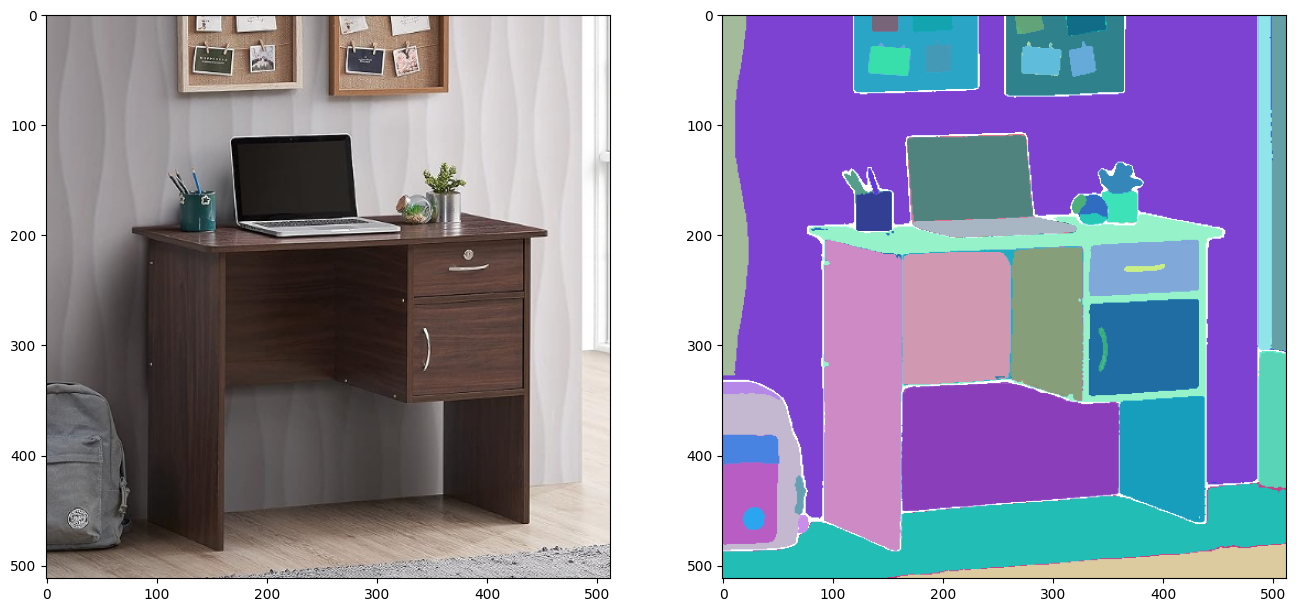

In [ ]:
from matplotlib import pyplot as plt

_, axes = plt.subplots(1,2, figsize=(16,16))
axes[0].imshow(image_rgb)
show_output(result, axes[1])

In [ ]:
segmentations = [segment['segmentation'] for segment in sorted(result, key=lambda x: x['area'], reverse=True)]
bboxes = [bbox['bbox'] for bbox in sorted(result, key=lambda x: x['area'], reverse=True)]
points =[point['point_coords'] for point in sorted(result, key=lambda x: x['area'], reverse=True)]

len(segmentations)

58

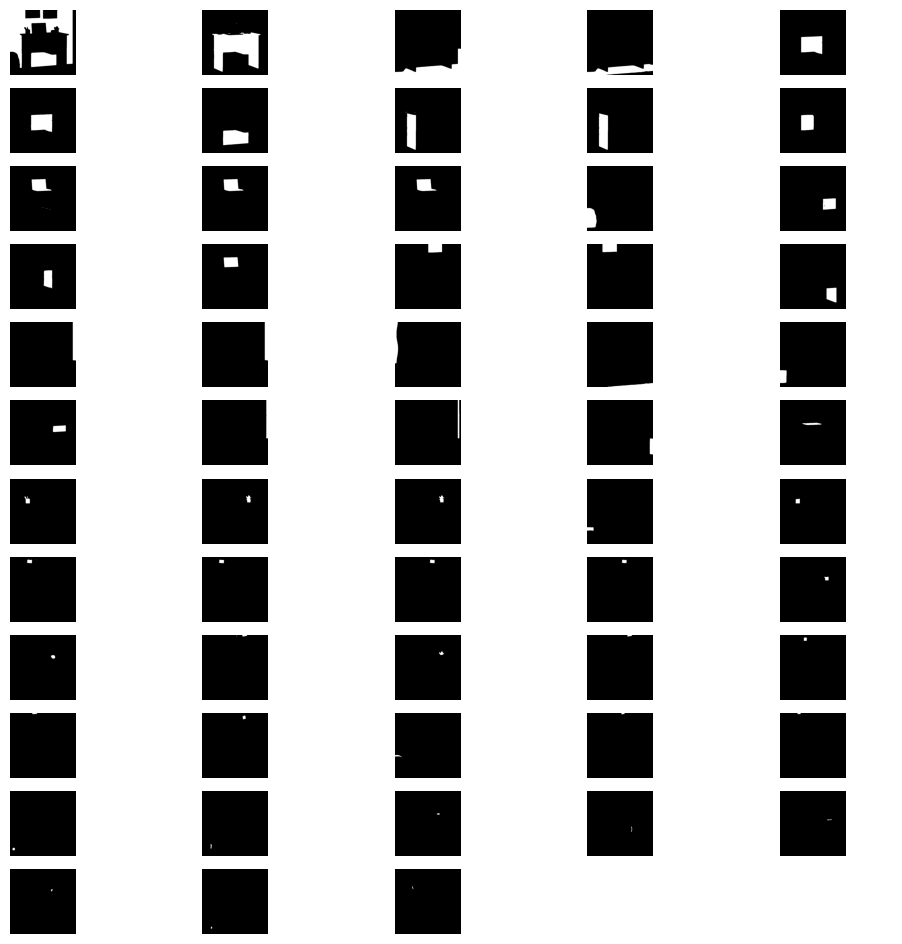

In [ ]:
import supervision as sv

sv.plot_images_grid(
    images = segmentations[:],
    grid_size = (12, 5),
)

In [ ]:
from PIL import Image
import numpy as np
prompt = 'wall made of stones'
mask_image = Image.fromarray(segmentations[0])

In [ ]:
SAM_DIFF_OUTPUT= pipe(
    prompt = prompt,
    image = image_rgb,
    mask_image = mask_image,
).images[0]

print(type(SAM_DIFF_OUTPUT), SAM_DIFF_OUTPUT.mode)

  0%|          | 0/50 [00:00<?, ?it/s]

<class 'PIL.Image.Image'> RGB


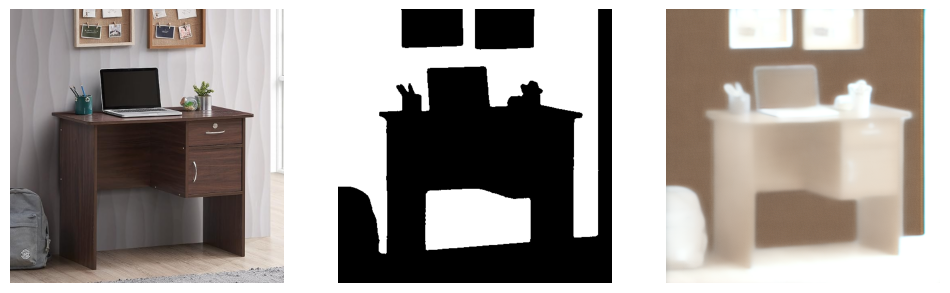

In [ ]:
SAM_DIFF_OUTPUT = np.array(SAM_DIFF_OUTPUT)
SAM_DIFF_OUTPUT = cv2.cvtColor(SAM_DIFF_OUTPUT, cv2.COLOR_RGB2BGR)

sv.plot_images_grid(
    images = [image_bgr, segmentations[0], SAM_DIFF_OUTPUT],
    grid_size = (1, 3),
)

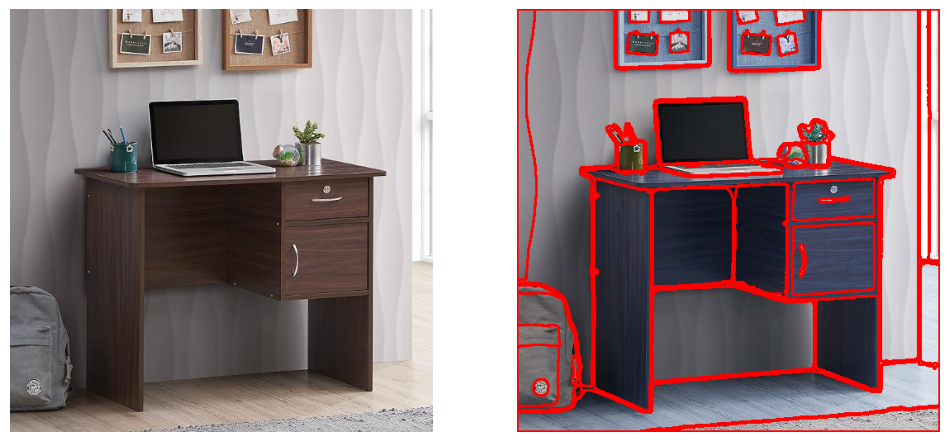

In [ ]:
# prompt: onto the provided image_rgb I want to segment on the basis of a prompt. For example if I type dog, the segment corresponding to the dog is colored green onto the image_bgr while all other segments are colored red

import os
import torch
import torch
from diffusers import StableDiffusionInpaintPipeline
from segment_anything import sam_model_registry, SamPredictor, SamAutomaticMaskGenerator
import cv2
from matplotlib import pyplot as plt
import supervision as sv
from PIL import Image
import numpy as np

# ... (Your existing code for loading models, image, generating masks, etc.) ...

def segment_and_color_image(image_rgb, prompt, segmentations, bboxes):
  """Segments the image based on the prompt and colors the corresponding segment green,
     other segments red on the original image.

  Args:
    image_bgr: The original image added as input.
    image_rgb: The original image in RGB format.
    prompt: The prompt used to identify the desired segment.
    segmentations: A list of segmentation masks.
    bboxes: A list of bounding boxes corresponding to the segments.

  Returns:
    The color-coded image with the specified segment in green and others in red.
  """

  image_bgr_copy = image_rgb.copy()

  for i, (mask, bbox) in enumerate(zip(segmentations, bboxes)):

    # Apply a threshold to the mask to get a binary mask
    binary_mask = (mask > 0.5).astype(np.uint8) * 255

    # Find contours in the binary mask
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Check if the prompt is in the prompt or description
    # Assuming this is part of another function to generate the best fitting mask
    if prompt.lower() in 'dog':
        color = (0, 255, 0)  # Green
    else:
        color = (0, 0, 255)  # Red

    # Draw contours on the image with specified color.
    cv2.drawContours(image_bgr_copy, contours, -1, color, 2)

  return image_bgr_copy


prompt = 'laptop' # Replace with your desired prompt
colored_image = segment_and_color_image(image_rgb, prompt, segmentations, bboxes)

sv.plot_images_grid(
    images = [image_bgr, colored_image],
    grid_size = (1, 2),
)
